# Вариант 11
## Егоров Алексей БПМ214

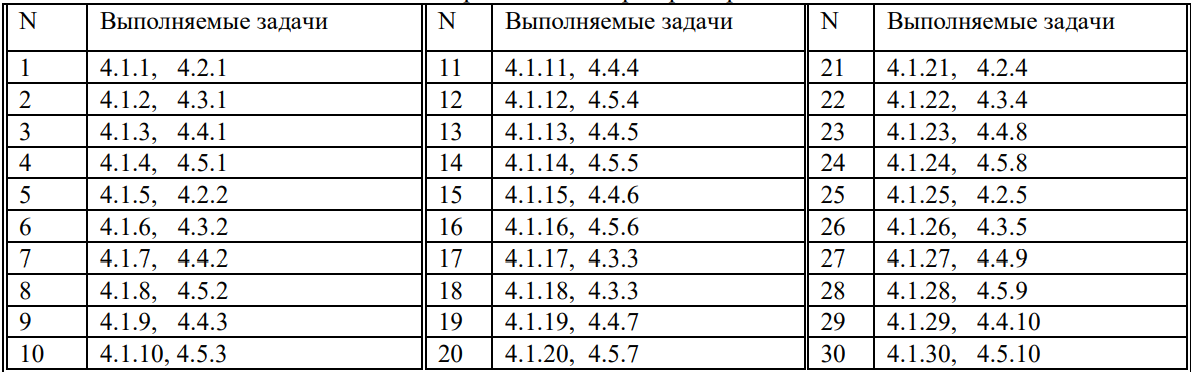

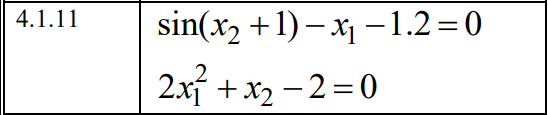

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def g1(x1):
    return np.arcsin(x1 + 1.2) - 1


def g2(x1):
    return 2 - 2 * x1**2

Локализуем x1: так как правая часть уравнения (1) от -2.2 до -0.2, то x1 может принимать только такие значения

C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_35724\290977668.py:2: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(x1 + 1.2) - 1


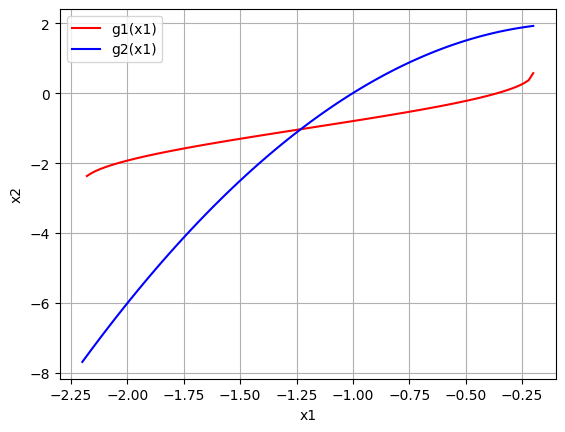

In [205]:
x1 = np.linspace(-2.2, -0.2, 100)
plt.plot(x1, g1(x1), color='r', label='g1(x1)')
plt.plot(x1, g2(x1), color='b', label='g2(x1)')
plt.xlabel("x1") 
plt.ylabel("x2")  
plt.legend() 
plt.grid()
plt.show()

In [61]:
from scipy import optimize
import sympy
import sys

In [93]:
def f(x):
    x = np.array(x)
    return np.array([np.sin(x[1] + 1.0) - x[0] - 1.2, 2*x[0]**2 + x[1] - 2])

In [95]:
x1 = sympy.symbols('x1')
x2 = sympy.symbols('x2')
f1 = sympy.sin(x2 + 1) - x1 - 1.2
f2 = 2 * x1**2 + x2 - 2


def jac(x):
    j = np.empty((2, 2))
    j[0, 0] = sympy.diff(f1, x1).evalf(subs={x1: x[0], x2: x[1]})
    j[0, 1] = sympy.diff(f1, x2).evalf(subs={x1: x[0], x2: x[1]})
    j[1, 0] = sympy.diff(f2, x1).evalf(subs={x1: x[0], x2: x[1]})
    j[1, 1] = sympy.diff(f2, x2).evalf(subs={x1: x[0], x2: x[1]})
    return j

In [96]:
def newtoon_solve(x, f, jac, eps = 1e-6, max_iter = 1000):
    iter = 0
    x0 = x
    d = np.linalg.solve(jac(x0), f(x0)*(-1))
    x1 = x0 + delta
    while iter < max_iter and np.linalg.norm(x1-x0) > eps:
        delta = np.linalg.solve(jac(x1), f(x1)*(-1))
        x0 = x1
        x1 = x1+d
        iter += 1
    return [x1, iter] 

In [102]:
newton_sol = newtoon_solve([-1.35, -2], f, jac)
print(f'решение системы методом ньютона: x1 = {newton_sol[0][0]}, x2 = {newton_sol[0][1]}')
print(f'количество итераций: {newton_sol[1]}')

решение системы методом ньютона: x1 = -1.2310721181629947, x2 = -1.031077120236645
количество итераций: 5


C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_35724\290977668.py:2: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(x1 + 1.2) - 1


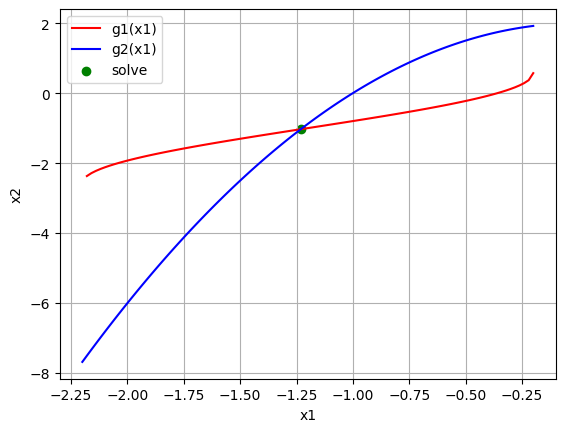

In [207]:
plt.plot(x1, g1(x1), color='r', label='g1(x1)')
plt.plot(x1, g2(x1), color='b', label='g2(x1)')
plt.scatter(newton_sol[0][0], newton_sol[0][1], color='g', label = 'solve')
plt.xlabel("x1") 
plt.ylabel("x2")  
plt.legend() 
plt.grid()
plt.show()

In [103]:
machine_sol = optimize.root(f, x0 = [-1.35, -2])  
print(f'решение системы: x1 = {solution.x[0]}, x2 = {solution.x[1]}')

решение системы: x1 = -1.2310721181624769, x2 = -1.0310771202346958


In [108]:
print(f'относительная погрешность: ({np.abs(solution.x[0] - newton_sol[0][0]) / np.abs(solution.x[0])}, {np.abs(solution.x[1] - newton_sol[0][1]) / np.abs(solution.x[1])})')

относительная погрешность: (4.206155033858323e-13, 1.8905759311128343e-12)


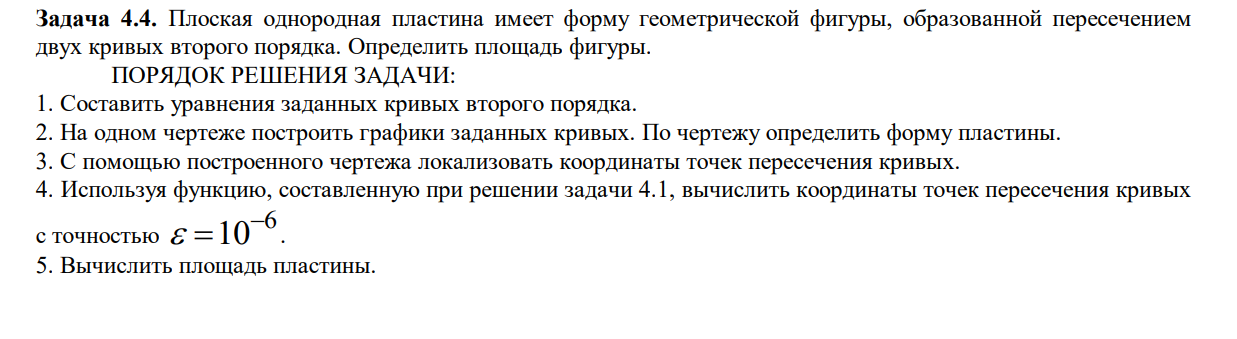

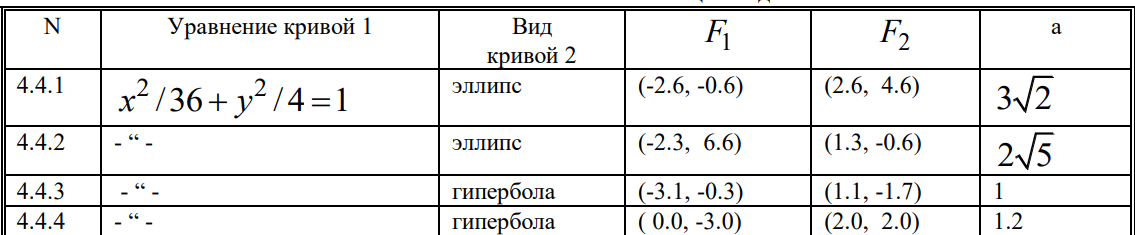

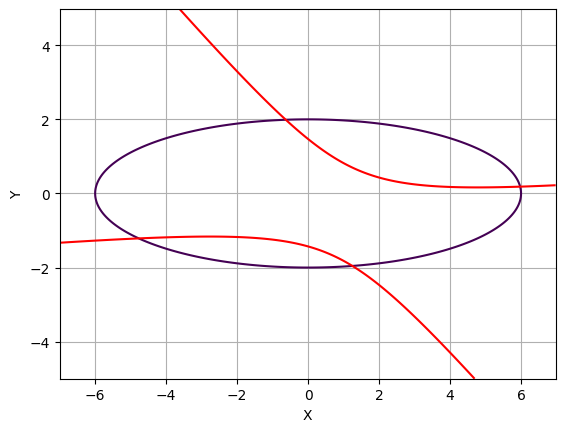

In [183]:
xrange = np.arange(-7.0, 7.0, 0.025)
yrange = np.arange(-5.0, 5.0, 0.025)
X, Y = np.meshgrid(xrange,yrange)

plt.contour(X, Y, (X**2/36+Y**2/4 - 1), [0])
plt.contour(X, Y, np.abs(np.sqrt(X**2 + (Y + 3)**2) - np.sqrt((X-2)**2 + (Y-2)**2)) - 2.4, [0], colors='r')
plt.xlabel("X") 
plt.ylabel("Y") 
plt.grid()
plt.show()

In [165]:
x = sympy.symbols('x')
y= sympy.symbols('y')

f3 = x**2/36+y**2/4 - 1
f4 = sympy.sqrt((sympy.sqrt(x**2 + (y + 3)**2) - sympy.sqrt((x-2)**2 + (y-2)**2))**2) - 2.4

def f_2(x):
    x = np.array(x)
    return np.array([x[0]**2/36+x[1]**2/4 - 1, np.abs(np.sqrt(x[0]**2 + (x[1] + 3)**2) - np.sqrt((x[0]-2)**2 + (x[1]-2)**2)) - 2.4])

def jac2(xs):
    j = np.empty((2, 2))
    j[0, 0] = sympy.diff(f3, x).evalf(subs={x: xs[0], y: xs[1]})
    j[0, 1] = sympy.diff(f3, y).evalf(subs={x: xs[0], y: xs[1]})
    j[1, 0] = sympy.diff(f4, x).evalf(subs={x: xs[0], y: xs[1]})
    j[1, 1] = sympy.diff(f4, y).evalf(subs={x: xs[0], y: xs[1]})
    return j

In [214]:
intersection_points = np.array([])
quater = ''
for coord in [[0, 2], [-6, -4], [1, -2], [6, 0]]:
    result = newtoon_solve(coord, f_2, jac2)
    intersection_points = np.append(intersection_points, result[0])
    if result[0][0] < 0 and result[0][1] < 0:
        quater = 'третьей'
    if result[0][0] < 0 and result[0][1] > 0:
        quater = 'второй'
    if result[0][0] > 0 and result[0][1] > 0:
        quater = 'первой'
    if result[0][0] > 0 and result[0][1] < 0:
        quater = 'четвертой'
    print(f'Точка пересечения в {quater} четверти: ({result[0][0]}, {result[0][1]}), итераций: {result[1]}')

intersection_points = intersection_points.reshape(4, 2)

Точка пересечения в второй четверти: (-0.6283974163459889, 1.9890007733401571), итераций: 3
Точка пересечения в третьей четверти: (-4.770458335707784, -1.2130186069506346), итераций: 5
Точка пересечения в четвертой четверти: (1.2481523056756008, -1.9562468550727063), итераций: 3
Точка пересечения в первой четверти: (5.974629485974359, 0.18372760795559662), итераций: 3


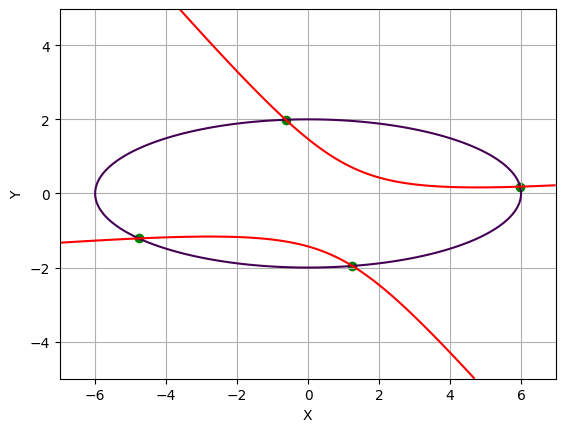

In [213]:
plt.contour(X, Y, (X**2/36+Y**2/4 - 1), [0])
plt.contour(X, Y, np.abs(np.sqrt(X**2 + (Y + 3)**2) - np.sqrt((X-2)**2 + (Y-2)**2)) - 2.4, [0], colors='r')
plt.scatter(intersection_points[0][0], intersection_points[0][1], color='g')
plt.scatter(intersection_points[1][0], intersection_points[1][1], color='g')
plt.scatter(intersection_points[2][0], intersection_points[2][1], color='g')
plt.scatter(intersection_points[3][0], intersection_points[3][1], color='g')
plt.xlabel("X") 
plt.ylabel("Y") 
plt.grid()
plt.show()

In [158]:
from scipy.integrate import dblquad

In [176]:
def f3_1(x, y):
    return x**2/36+y**2/4 - 1


def f4_1(x,y):
    return np.sqrt((np.sqrt(x**2 + (y + 3)**2) - np.sqrt((x-2)**2 + (y-2)**2))**2) - 2.4

In [175]:
lower_limit = lambda x: -2 * np.sqrt(1 - (x / 6)**2)
upper_limit = lambda x: 2 * np.sqrt(1 - (x / 6)**2)

def intersect_region(x, y):
    return np.logical_and(f3_1(x, y) <= 0, f4_1(x, y) <= 0)
intersect_area, _ = dblquad(lambda y, x: intersect_region(x, y), -4, 4, lower_limit, upper_limit)
print("Площадь между кривыми:", intersect_area)

Площадь пересечения кривых: 21.26334704769194


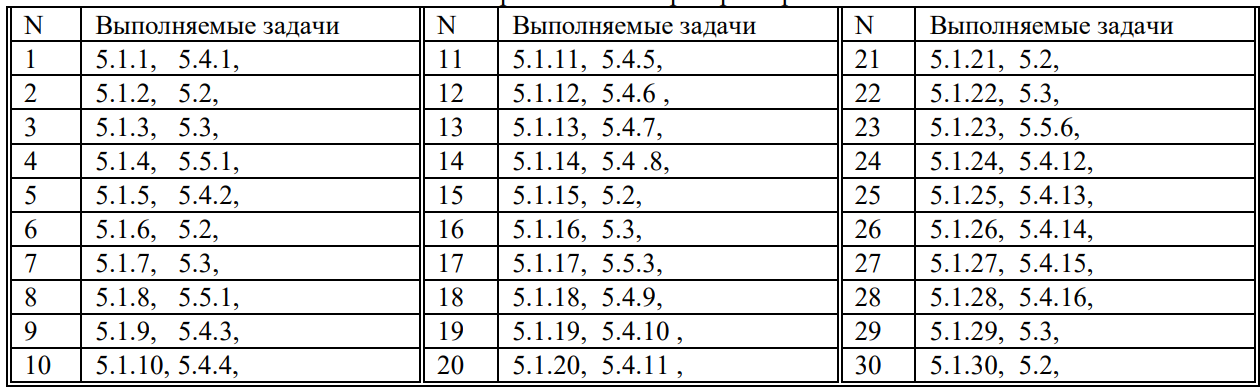

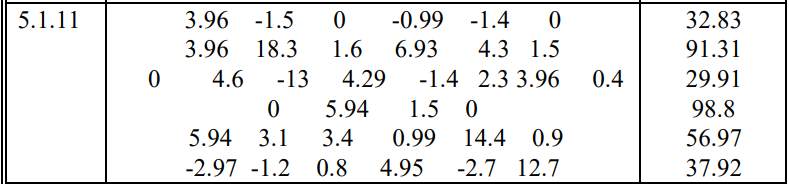

In [5]:
A = np.array([[3.96, -1.5, 0, -0.99, -1.4, 0], [3.96, 18.3, 1.6, 6.93, 4.3, 1.5], [0, 4.6, -13, 4.29, -1.4, 2.3], [3.96, 0.4, 0, 5.94, 1.5, 0], [5.94, 3.1, 3.4, 0.99, 14.4, 0.9], [-2.97, -1.2, 0.8, 4.95, -2.7, 12.7]])
b = np.array([32.83, 91.31, 29.91, 98.8, 56.97, 37.92])


In [6]:
def gauss_method_with_complete_choice(A, b):
    n = len(A)
    E = np.append(A, b.reshape((n, 1)), axis= 1 )
    P = np.arange(n)  # вектор перестановок
    
    #Прямой ход
    for i in range(n):
        a_max = [np.argmax(E[i:, i:-1])//(n-i)+i, np.argmax(E[i:, i:-1])%(n-i)+i] 
        E[[i, a_max[0]], :] = E[[a_max[0], i], :]
        P[i], P[a_max[1]] = P[a_max[1]], P[i]
        E[:, [i, a_max[1]]] = E[:, [a_max[1], i]]
        E[i, :] = E[i, :]/E[i, i]
        for j in range(i+1, n):
            E[j, :] -= E[i, :]*E[j, i]
            
    #Обратный ход
    for i in range(n):
        for j in range(i+1, n):
            E[n-j-1, :] -= E[n-i-1, :]*E[n-j-1, n-i-1]
    #Меняем метами строки в соответствие с начальным порядком переменных
    E = E[:, np.append(P.argsort(), n)]
    for i in range(n):
        if E[i, i] != 1:
            for j in range(n):
                if E[j, i] == 1:
                    E[[i, j], :] = E[[j, i], :]
    return E[:, -1]

In [12]:
true_answer = gauss_method_with_complete_choice(A, b)
print(np.allclose(np.dot(A, true_answer), b))
print(true_answer)

True
[10.11111111 -1.          1.         10.21212121 -1.          1.        ]


In [13]:
np.linalg.solve(A, b)

array([10.11111111, -1.        ,  1.        , 10.21212121, -1.        ,
        1.        ])

In [14]:
def transform_to_B_and_c(A, b):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.linalg.inv(D)
    B = -np.dot(D_inv, R)
    c = np.dot(D_inv, b)
    return(B, c)
B, c = transform_to_B_and_c(A, b)
print("B = ", B)
print("c = ", c)

B =  [[-0.          0.37878788 -0.          0.25        0.35353535 -0.        ]
 [-0.21639344 -0.         -0.08743169 -0.37868852 -0.23497268 -0.08196721]
 [-0.          0.35384615 -0.          0.33       -0.10769231  0.17692308]
 [-0.66666667 -0.06734007 -0.         -0.         -0.25252525 -0.        ]
 [-0.4125     -0.21527778 -0.23611111 -0.06875    -0.         -0.0625    ]
 [ 0.23385827  0.09448819 -0.06299213 -0.38976378  0.21259843 -0.        ]]
c =  [ 8.29040404  4.98961749 -2.30076923 16.63299663  3.95625     2.98582677]


In [15]:
np.linalg.norm(B, np.inf)

0.9994535519125683

In [16]:
def zeid(A, b, x0, max_iter):
    B, c = transform_to_B_and_c(A, b)
    x = x0
    for k in range(1, max_iter+1):
        for i in range(len(x0)):
            x[i] = (np.dot(B, x) + c)[i]
    return x

In [18]:
x1 = zeid(A, b, np.zeros(6, dtype=np.float64), 10)
print('Вектор решений:', x1)

Вектор решений: [10.11865729 -1.00557805  1.00011765 10.20686727 -1.001209    1.00302103]


In [19]:
print('Абсолютная погрешность:', np.linalg.norm(x1-true_answer, np.inf))

Абсолютная погрешность: 0.007546176916530811


In [21]:
x2 = zeid(A, b, np.array([10, -1, 1, 10, -1, 1], dtype=np.float64), 10)
print('Вектор решений:', x2)

Вектор решений: [10.11129877 -1.00013872  1.00000293 10.21199057 -1.00003007  1.00007512]


In [22]:
print('Абсолютная погрешность:', np.linalg.norm(x2-true_answer, np.inf))

Абсолютная погрешность: 0.00018765820678545708


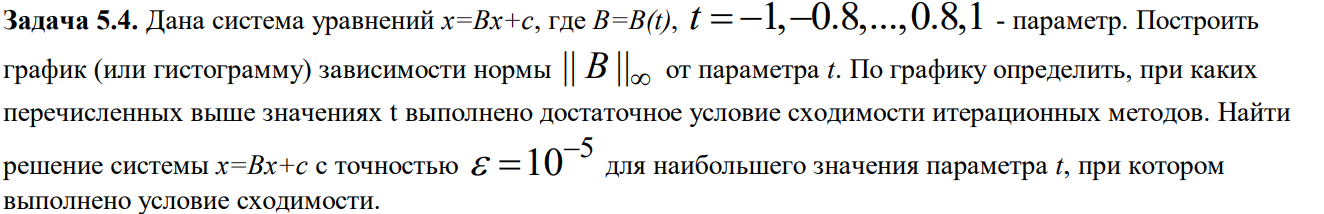

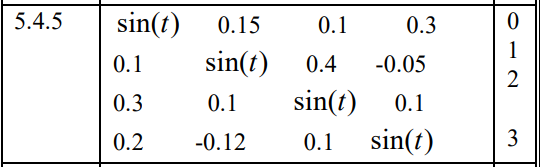

In [24]:
c = np.array([0, 1, 2, 3])
def set_B(t):
    return np.array([[np.sin(t), 0.15, 0.1, 0.3], [0.1, np.sin(t), 0.4, -0.05], [0.3, 0.1, np.sin(t), 0.1], [0.2, -0.12, 0.1, np.sin(t)]])

In [27]:
ts = np.arange(-1, 1, 0.2)
Bs = [np.linalg.norm(set_B(t), np.inf) for t in ts]

In [36]:
Bnorm_corr = [el for el in Bs if el < 1]
Bmax_corr = np.max(Bnorm_corr)

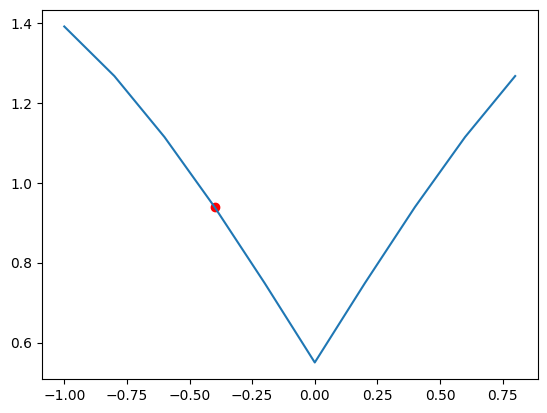

In [39]:
plt.plot(ts, Bs)
plt.scatter(ts[np.where(Bs == Bmax_corr)], Bmax_corr, color='r')

In [72]:
np.linalg.solve(np.eye(4) - set_B(ts[np.where(Bs == Bmax_corr)][0]), c)

array([0.76200537, 1.22669697, 1.85756323, 2.29661122])

In [73]:
# def seidel(B, c, eps):
#     n = len(B)
#     x = np.zeros(n)  # Начальное приближение (нулевой вектор)
#     converge = False

#     while not converge:
#         x_new = np.copy(x)
#         for i in range(n):
#             s1 = sum(B[i][j] * x_new[j] for j in range(i))
#             s2 = sum(B[i][j] * x[j] for j in range(i + 1, n))
#             x_new[i] = c[i] - s1 - s2

#         converge = np.linalg.norm(x_new - x) <= eps
#         x = x_new

#     return x